In [2]:
from importlib import reload
import os
import numpy as np
import time
from tqdm import trange
from pulsestreamer import *
from nidaqmx import *

import analysis
reload(analysis)
from analysis import *

import measurement
reload(measurement)
from measurement import *

In [22]:
# loading the local Pulse Streamer and NIDAQmx

IPaddress = findPulseStreamers(search_serial='')[0][0]
pulser = PulseStreamer(IPaddress)

DAQ_device = nidaqmx.system.System.local().devices[0]
device_name = DAQ_device.terminals[0:1][0][1:5]
print(f'NIDAQmx device name : {device_name}')

Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 169.254.8.2
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0
NIDAQmx device name : Dev1


To Check 


1.Doing with the usual sequence with signal and reference at the end.

In [590]:
specs_ports = {'laserNum' : 1, 'gateStart' : 5, 'source' : 7}

specs_delay = {'rising_delay' : 2,'gatelen' :  6, 'laserontime' :  31,'delay_pad' :  2,'delay_shift' :  2,'gatesourcedelay' : 2}
specs_t1 = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,'delay_shift' : 45e3,'gatesourcedelay' : 5,'evolution_time' : 0.45e6}
specs_snr = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,'delay_shift' : 150e3,'gatesourcedelay' : 5,'evolution_time' : 1.5e6}
specs_lifetime = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,'delay_shift' : 150e3,'gatesourcedelay' : 5,'evolution_time' : 1.5e6}  #change this 

In [592]:
def merge(dict1,dict2):
    res = {**dict1,**dict2}
    return res

In [817]:
total_specs = merge(specs_ports,specs_t1)
avg_data,time_axis = measure(pulser,DAQ_device,device_name,exp_name = 't1',
                   samples=1000,averages=20,specifications=total_specs)

number of steps : 10
Pixel : 20000
creating sequence
starting DAQ
Preparing Ni Daq for the experiment
callback number in beginning: 0


  0%|          | 0/20 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10


  5%|▌         | 1/20 [00:02<00:56,  2.95s/it]

callback number after 1-th average end: 10
1
2
3
4
5
6
7
8
9
10


 10%|█         | 2/20 [00:05<00:53,  2.97s/it]

callback number after 2-th average end: 20
1
2
3
4
5
6
7
8
9
10


 15%|█▌        | 3/20 [00:08<00:50,  2.96s/it]

callback number after 3-th average end: 30
1
2
3
4
5
6
7
8
9
10


 20%|██        | 4/20 [00:11<00:47,  2.97s/it]

callback number after 4-th average end: 40
1
2
3
4
5
6
7
8
9
10


 25%|██▌       | 5/20 [00:14<00:44,  2.97s/it]

callback number after 5-th average end: 50
1
2
3
4
5
6
7
8
9
10


 30%|███       | 6/20 [00:17<00:41,  2.97s/it]

callback number after 6-th average end: 60
1
2
3
4
5
6
7
8
9
10


 35%|███▌      | 7/20 [00:20<00:38,  2.97s/it]

callback number after 7-th average end: 70
1
2
3
4
5
6
7
8
9
10


 40%|████      | 8/20 [00:23<00:35,  2.97s/it]

callback number after 8-th average end: 80
1
2
3
4
5
6
7
8
9
10


 45%|████▌     | 9/20 [00:26<00:32,  2.97s/it]

callback number after 9-th average end: 90
1
2
3
4
5
6
7
8
9
10


 50%|█████     | 10/20 [00:29<00:29,  2.97s/it]

callback number after 10-th average end: 100
1
2
3
4
5
6
7
8
9
10


 55%|█████▌    | 11/20 [00:32<00:26,  2.98s/it]

callback number after 11-th average end: 110
1
2
3
4
5
6
7
8
9
10


 60%|██████    | 12/20 [00:35<00:23,  2.98s/it]

callback number after 12-th average end: 120
1
2
3
4
5
6
7
8
9
10


 65%|██████▌   | 13/20 [00:38<00:20,  2.98s/it]

callback number after 13-th average end: 130
1
2
3
4
5
6
7
8
9
10


 70%|███████   | 14/20 [00:41<00:17,  2.98s/it]

callback number after 14-th average end: 140
1
2
3
4
5
6
7
8
9
10


 75%|███████▌  | 15/20 [00:44<00:14,  2.98s/it]

callback number after 15-th average end: 150
1
2
3
4
5
6
7
8
9
10


 80%|████████  | 16/20 [00:47<00:11,  2.97s/it]

callback number after 16-th average end: 160
1
2
3
4
5
6
7
8
9
10


 85%|████████▌ | 17/20 [00:50<00:08,  2.97s/it]

callback number after 17-th average end: 170
1
2
3
4
5
6
7
8
9
10


 90%|█████████ | 18/20 [00:53<00:05,  2.97s/it]

callback number after 18-th average end: 180
1
2
3
4
5
6
7
8
9
10


 95%|█████████▌| 19/20 [00:56<00:02,  2.97s/it]

callback number after 19-th average end: 190
1
2
3
4
5
6
7
8
9
10


100%|██████████| 20/20 [00:59<00:00,  2.97s/it]

callback number after 20-th average end: 200
Total Run : 200
Total Counts & Counts in one average : (400000, 20000)
Crosscheck number of averges= 20
returning averaged counts and time_axis


In [819]:
dict_args = {'avg_data':avg_data,'time_axis':time_axis}

In [821]:
root_directory = os.getcwd()
print(f'root directory : {root_directory}')

root directory : C:\Users\Administrator\OneDrive\Desktop\T1_measurement\atanu_github\Instrument_Automation\Experimental_Applications


In [823]:
year = time.ctime()[-4:]
date = time.ctime()[4:10].replace(' ','_')
current_time = time.ctime()[-13:-8].replace(':','_')

folder_path = root_directory+f'/exp_data/{year}/{date}/microdiamonds/t1/with_Gd/525nm/avgs_20/samples_1000/second_cluster'
file_name = f'[{current_time}]_gatelen_2000ns.npz'

total_path = npz_save(folder_path,file_name,**dict_args)

saving data_file '[13_47]_gatelen_2000ns.npz' is successful!



In [825]:
load_data = dict(np.load(total_path))

In [827]:
steps=int(input('Enter the no of steps'))
samples=int(input('Enter the no of samples'))

# Separating Reference and Signal and averaging over Samples
reference_samples = np.mean(np.reshape(load_data['avg_data'][::2],(steps,samples)),axis=1)
signal_samples = np.mean(np.reshape(load_data['avg_data'][1::2],(steps,samples)),axis=1)
signal_photon = signal_samples/reference_samples

Enter the no of steps 10
Enter the no of samples 1000


Lifetime in nano_second is : 241396.6 ± 112380.3



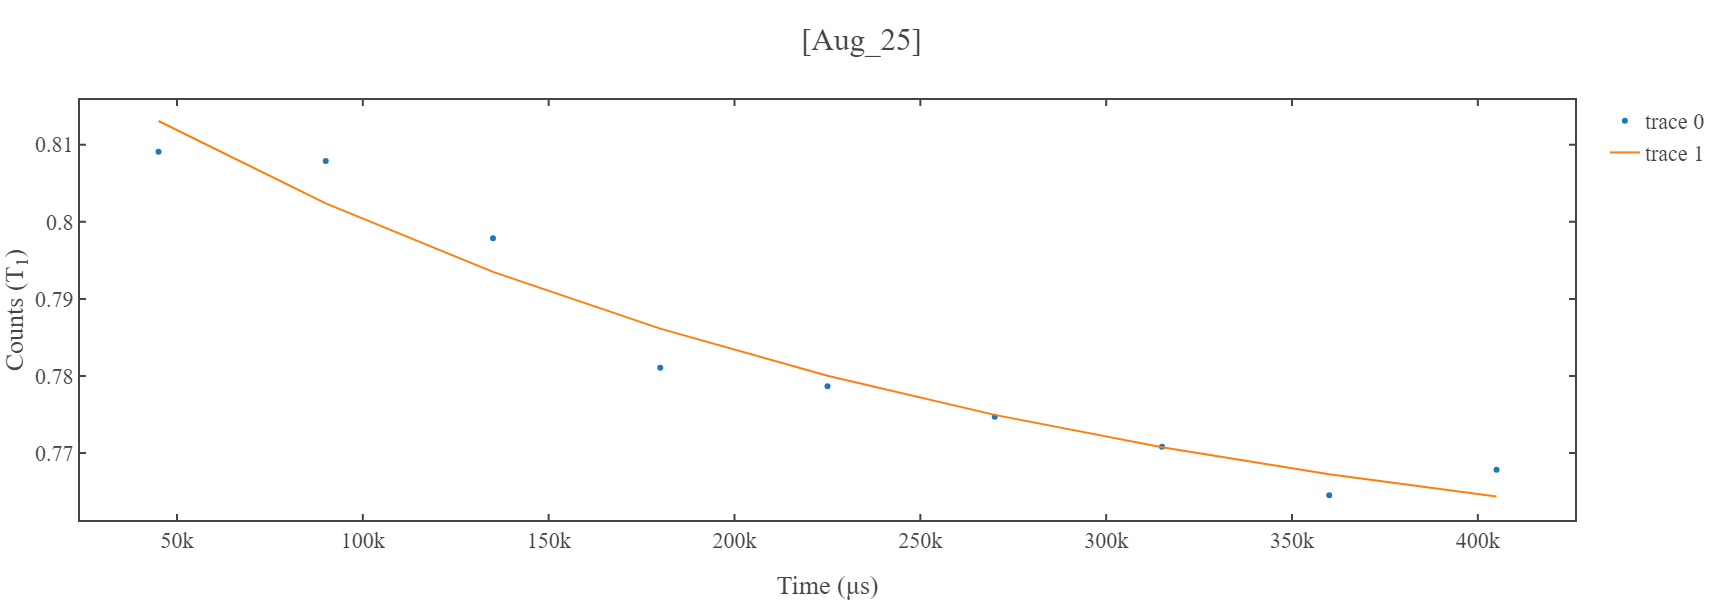

In [829]:
x=load_data['time_axis'][1:]
y=signal_photon[1:]

x_fit,y_fit,coefficient,error_bars = fit_func(x,y,fit_range=False,func='exp',guess_params=np.array([0.7,0.9,0.08e6]))

fig1 = simple_plot(x,y,show=False,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='markers',title=f'{date}')
fig2 = simple_plot(x_fit,y_fit,show=False,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='lines',title=f'{date}')

add_figures([fig1,fig2],show=True,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='markers',title=f'[{date}]')

aug 25

[microdiamonds: with Gd]

|First cluster|
|---|
|525nm| 
|139627.0 ± 24870.8|
|109969.9 ± 19927.5|
|173939.4 ± 46986.9|
|141961.8 ± 26575.8|


|Second cluster|
|---|
|525nm| 
|124845.5 ± 21125.8|
|136907.4 ± 36131.9|
|122364.7 ± 31024.0|
|111301.4 ± 28560.3|
|120682.2 ± 33560.6|



|Exactly Third cluster|
|---|
|525nm| 
|132341.0 ± 16773.9|
|132363.3 ± 21448.4|
|197703.5 ± 49095.9|
|165850.7 ± 45205.4|


|Exactly Fourth cluster|
|---|
|525nm| 
|117352.0 ± 36744.7|
|242664.8 ± 91008.5|
|163019.6 ± 65806.7|
|167007.4 ± 36303.0|



|Exactly Second cluster|
|---|
|525nm| 
|120159.9 ± 33526.0|
|333294.5 ± 150108.9|
|311241.4 ± 110787.6|
|241396.6 ± 112380.3|

aug 25

[microdiamonds: without Gd]


|First cluster|---|
|without Gd|with Gd|
|---|---|
|525nm|---| 
|327057.9 ± 218284.6|
|284824.5 ± 277792.0|
|211116.4 ± 138783.8|
|171194.0 ± 73435.1|
|270019.2 ± 115482.8|
|273327.5 ± 139107.8|



|Second cluster||
|---|---|
|without Gd|with Gd|
|525nm|---|
|120854.2 ± 21673.1|120159.9 ± 33526.0|
|111013.6 ± 15189.9|333294.5 ± 150108.9|
|164799.6 ± 62196.9|311241.4 ± 110787.6|
|164575.1 ± 61486.0|241396.6 ± 112380.3|
|157116.7 ± 32932.8|



|Third cluster||
|---|---|
|without Gd|with Gd|
|525nm|---|
|184286.1 ± 105686.6|132341.0 ± 16773.9|
|163258.3 ± 65822.4|132363.3 ± 21448.4|
|131656.1 ± 54890.6|197703.5 ± 49095.9|
|144755.6 ± 58334.6|165850.7 ± 45205.4|
|138425.1 ± 57815.4|


|Fourth cluster||
|---|---|
|without Gd|with Gd|
|525nm|---|
|99311.8 ± 28351.7|117352.0 ± 36744.7|
|112164.7 ± 29047.8|242664.8 ± 91008.5|
|128391.8 ± 26992.6|163019.6 ± 65806.7|
|221332.2 ± 74910.7|167007.4 ± 36303.0|
|114671.4 ± 35592.2|
|162335.8 ± 40895.1|


|Fifth cluster|
|---|
|525nm| 
|179350.8 ± 59943.0|
|128834.5 ± 44834.0|
|140267.0 ± 50633.9|
|183650.0 ± 72630.2|
|144310.7 ± 35843.2|

aug 24 
[microdiamonds + Gd]

|First cluster|
|---|
|525nm| 
|40068.0 ± 3063.1|
|42860.1 ± 7226.0|
|48763.4 ± 16088.9|
|51921.2 ± 14861.3|
|55811.6 ± 6953.0|
|49455.2 ± 5478.9|


|1064nm|---|
|---|---|
|ref|T1 time|
|3.0 | 61421.0 ± 30557.8|
|3.0 | 48330.2 ± 10665.2|
|3.0 | 74655.5 ± 44794.7|
|3.0 | 35523.8 ± 25893.8|
|3.5 | 93790.8 ± 54924.3|
|3.5 | 30102.8 ± 9410.1|
|3.5 | 65691.4 ± 22225.2|
|3.5 | 59232.4 ± 18291.0|



|Second cluster|
|---|
|525nm| 
|45676.1 ± 6123.8|
|37112.1 ± 4946.6|
|41952.2 ± 6640.2|

aug 24 [nanodiamonds]

|First cluster|
|---|
|525nm| 
|93768.0 ± 44496.9|
|130586.5 ± 52331.7|
|57509.9 ± 44436.9|
|104303.6 ± 34683.0|
|104504.7 ± 45887.7|


|1064nm|---|
|---|---|
|ref|T1 time|
|3.0 | 67350.3 ± 35563.4|
|3.0 | 81103.3 ± 36710.4|
|3.5 | 51858.9 ± 17966.2|
|3.5 | 136542.5 ± 67754.5|

aug 24 [microdiamonds]



|First cluster|
|---|
|525nm| 
|68829.4 ± 9254.6|
|69607.5 ± 10309.3|


|1064nm|---|
|---|---|
|ref|T1 time|
|3.0 | 56823 ±7301|
|3.0 | 69490 ± 12632|
|2.5 | 68989 ± 15831|
|2.5 | 119837 ± 67762|
|2.5 | 71082 ± 14699|
|1.8 | 67376 ± 9967|
|1.8 | 72739.5 ± 13035.3|
|1.5 | 65395.4 ± 15182.6|
|1.5 | 67725.5 ± 9186.4|


|Second cluster|
|---|
|525nm| 
|71071.5 ± 15701.0|
|74578.0 ± 20612.7|


|1064nm|---|
|---|---|
|ref|T1 time|
|3.0 | 67085.5 ± 12373.5|
|3.0 | 61321.2 ± 6455.8|
|2.5 | 64701.8 ± 13872.8|
|2.5 | 69193.8 ± 12028.9|
|1.5 | 70537.1 ± 11336.2|
|1.5 | 70400.5 ± 13536.8|



|Third cluster|
|---|
|525nm| 
|104819.0 ± 44788.9|
|90981.8 ± 22758.5|
|101823.0 ± 24703.7|


|1064nm|---|
|---|---|
|ref|T1 time|
|3.5 | 92433.4 ± 30567.5|
|3.5 | 99001.1 ± 21609.8|
|3.5 | 82176.3 ± 20461.7|
|3.0 | 78441.2 ± 16775.4|
|3.0 | 66469.5 ± 17059.2|
|3.0 | 76017.2 ± 16725.8|
|2.5 | 94855.7 ± 35432.8|
|2.5 | 99844.8 ± 28797.3|
|2.0 | 100639.8 ± 32903.3|
|2.0 | 97363.7 ± 18515.8|
|1.5 | 114262.7 ± 28999.7|
|1.5 | 80171.1 ± 15750.3|



|Fourth cluster|
|---|
|525nm| 
|104819.0 ± 44788.9|
|90981.8 ± 22758.5|
|101823.0 ± 24703.7|


|1064nm|---|
|---|---|
|ref|T1 time|
|3.5 | 92433.4 ± 30567.5|
|3.5 | 99001.1 ± 21609.8|
|3.5 | 82176.3 ± 20461.7|
|3.0 | 78441.2 ± 16775.4|
|3.0 | 66469.5 ± 17059.2|
|3.0 | 76017.2 ± 16725.8|
|2.5 | 94855.7 ± 35432.8|
|2.5 | 99844.8 ± 28797.3|
|2.0 | 100639.8 ± 32903.3|
|2.0 | 97363.7 ± 18515.8|
|1.5 | 114262.7 ± 28999.7|
|1.5 | 80171.1 ± 15750.3|


Fourth cluster
1064nm[ref,T1 time] :
[3.5, 101458.4 ± 36825.8], [3.5, 85097.8 ± 20792.9], 
[3.0, 98362.4 ± 31720.5], [3.0, 89103.3 ± 25288.2], 
[2.5, 99176.5 ± 18393.6], [2.5, 119495.9 ± 47600.3],
[2.0,119530.9 ± 36117.3],[2.0,107079.0 ± 29308.1],
[1.5,121625.2 ± 38036.4], [1.5,114719.8 ± 35717.1],

525nm : [52397.5 ± 8535.3], [136266.8 ± 51588.5], [112075.1 ± 28177.5], [83779.3 ± 25679.8]


Fifth cluster
1064nm[ref,T1 time] :
[3.5, 76786.3 ± 27357.7], [3.5, 71841.6 ± 22155.7], 
[3.0, 99886.7 ± 38276.8], [3.0, 78787.1 ± 14244.6], 
[2.5, 97915.9 ± 18053.8], [2.5, 87557.9 ± 31101.7],
[2.0, 80815.6 ± 30691.5],[2.0,89765.8 ± 25248.7],
[1.5,68802.8 ± 10240.9], [1.5,102072.6 ± 21439.2],

525nm : [64949.8 ± 12674.0], [50273.2 ± 15350.1], [82797.6 ± 24052.6]


Sixth cluster
1064nm[ref,T1 time] :
[3.5, 91093.9 ± 25117.2], [3.5, 90519.2 ± 34315.6], 
[3.0, 104512.0 ± 25966.5], [3.0, 86031.4 ± 20851.0], 
[2.5, 93954.6 ± 29233.8], [2.5, 113082.4 ± 14175.1],
[2.0, 132745.9 ± 47809.0],[2.0, 112468.5 ± 32599.6],
[1.5, 83065.7 ± 8536.5], [1.5,106973.6 ± 19669.7],

525nm : [109528.0 ± 30072.4], [76351.2 ± 17468.0], [95836.6 ± 23311.3]



Seventh cluster
1064nm[ref,T1 time] :
[3.5, 151498.3 ± 42343.8], [3.5, 110821.7 ± 35233.9], 
[3.0, 109746.4 ± 36719.1], [3.0, 108717.9 ± 27660.8], 
[2.5, 144796.5 ± 36443.1], [2.5, 120573.1 ± 17501.8],
[2.0, 122048.1 ± 35678.0],[2.0, 134687.9 ± 26399.2],
[1.5, 105877.2 ± 28425.0], [1.5,143534.6 ± 52851.9],

525nm : [121878.5 ± 26917.1], [141545.2 ± 48195.9], [120397.7 ± 18641.4], [147878.0 ± 56004.6]

In [774]:
# simple_plot(x=np.array([1.5,1.8,2.2,2.5,2.8,3,3.2,3.4,3.6,3.9]),y= np.array([37,80,167,231,315,360,450,580,604,840]),
#             show=True,x_name = "source reference",y_name = "source power(mW)",mode='markers',title=f'1064nm [{date}]')

aug 22

specifications to the plot
sample : microdiamond (500nm)

calibration of the 525nm laser power(watt) at the sample plane:
>source : np.array([3,5,7,9,11,13,15,17,19])*1e-3

>sample plane : np.array([2.6,4,5.5,6.5,7.7,8.1,9.6,10.6,12])*1e-6 - 0.6e-6 (background illumination) 

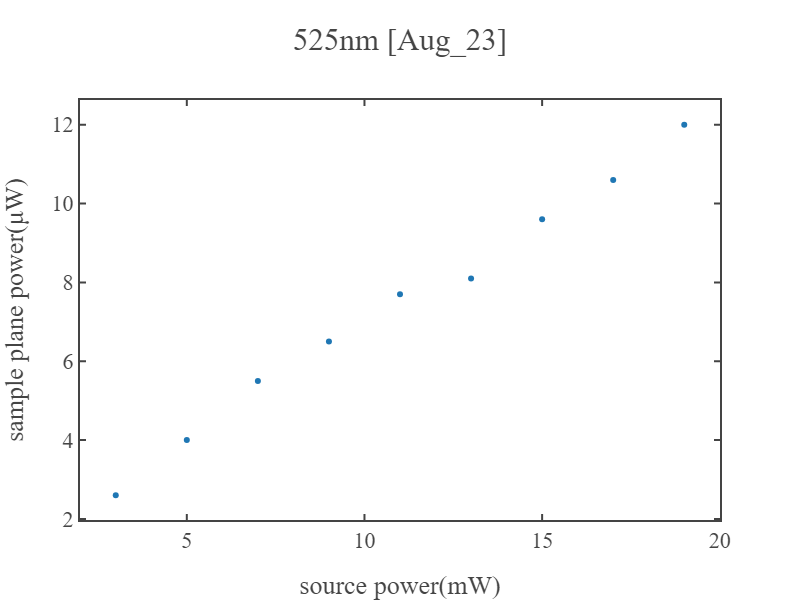

calibration of the 1064nm laser power(watt) at the sample plane:
>source : np.array([37,80,167,231,315,360,450,580,604,840])*1e-3

>source_current : np.array([1.5,1.8,2.2,2.5,2.8,3,3.2,3.4,3.6,3.9])

>sample plane : np.array([2.2,4.5,8.5,17,21,28,34,48,50,72])*1e-3 - 100e-6 (background illumination) 

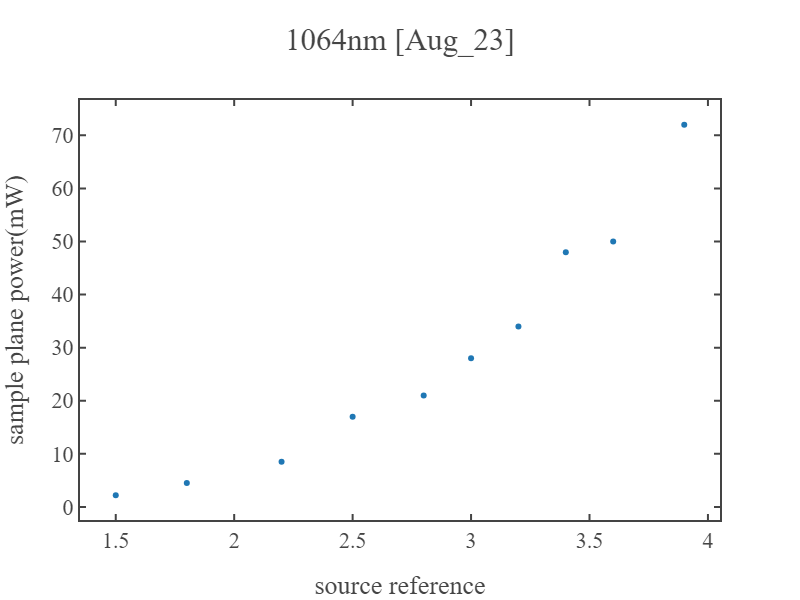
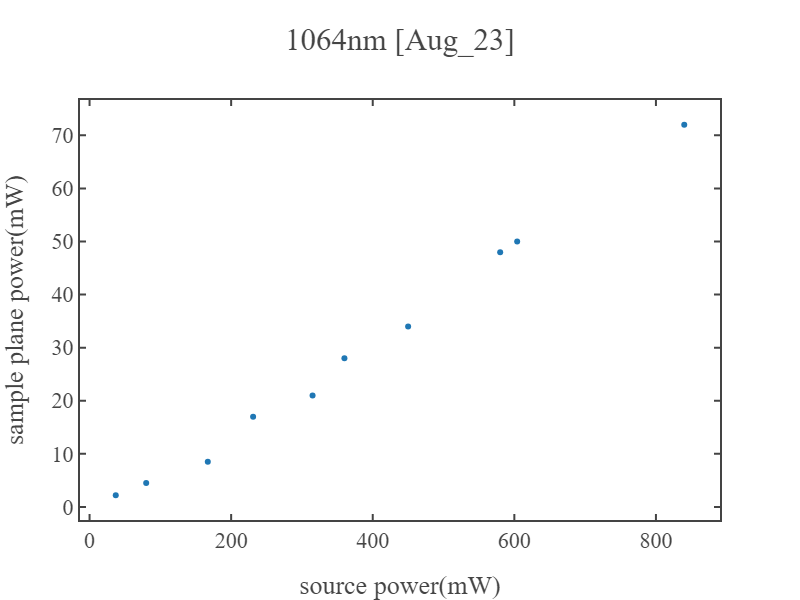
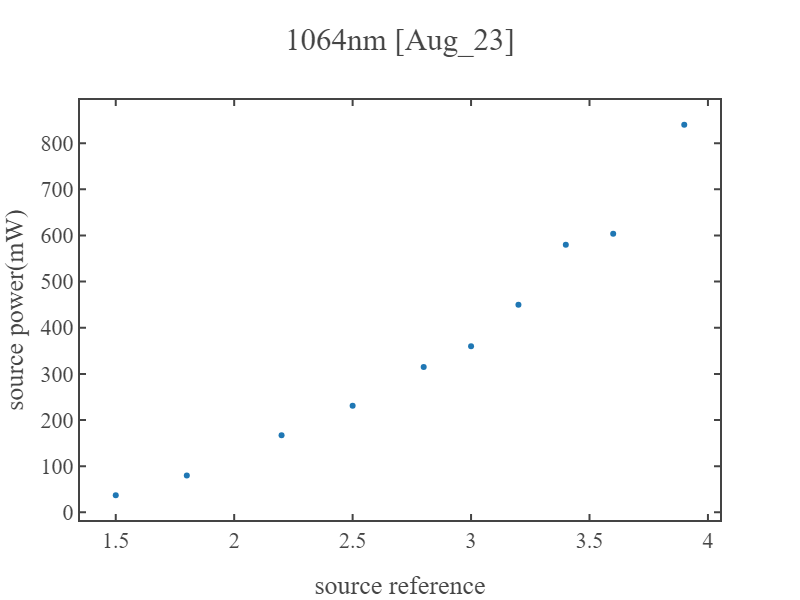

[Aug 24]

There are exponential trends in signal and reference but not in signal/reference (525nm). Sig/Ref comes to previous trend after three four runs.

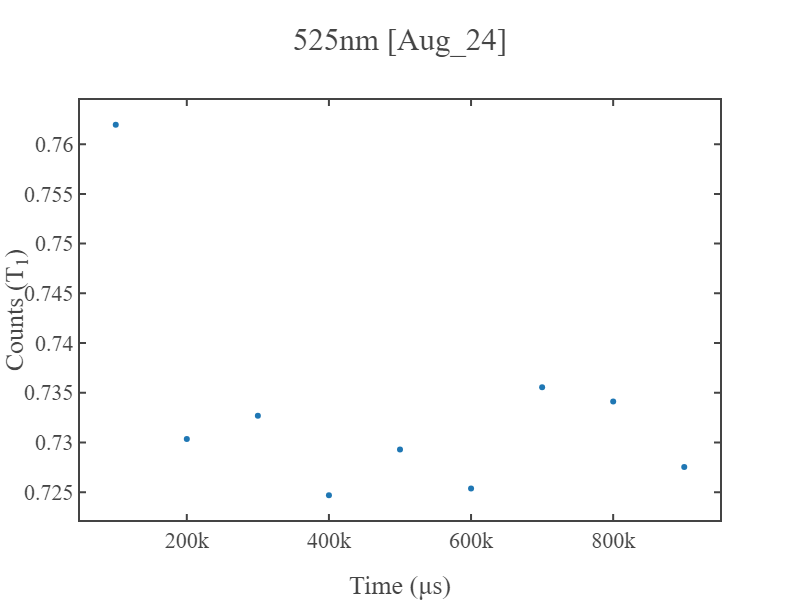
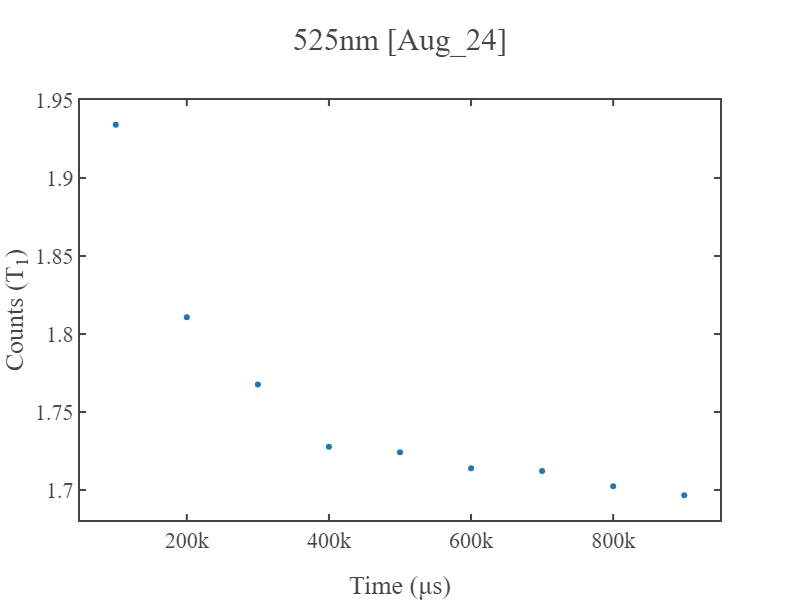
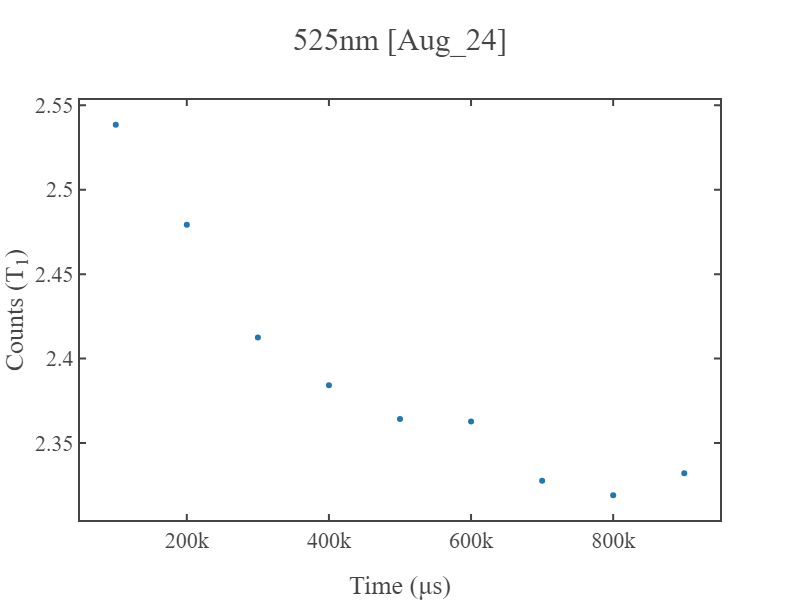